**Linear Regression is one of the most basic and popular algorithms in machine learning.**

**It’s intuitive, has a good range of uses, and is fairly straightforward to understand.**

**With this project we'll build a simple Univariate Linear Regression Model in Python from scratch to predict House Prices.**

**The basic idea behind Linear Regression.**

Suppose you have the dataset (Training set) of the prices of houses (Target variable) given any feature, like the size of house or the number of rooms in the house (predictor or feature). Now your job is to **predict the price of any other house**, given the same feature which was given in the training dataset (like the number of rooms).

What Linear Regression technique does is, it finds the best possible line which fits that training set and then predicts the price of any unseen house. 

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
%matplotlib inline
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import style

In [17]:
from google.colab import files
files.upload()

Saving housingdata.csv to housingdata (1).csv


{'housingdata.csv': b'0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\r\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\r\n0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\r\n0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\r\n0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\r\n0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\r\n0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\r\n0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\r\n0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\r\n0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\r\n0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\r\n0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\r\n0.09378,12.5,7.87,0,0.524,5.889,39,5.4509,5,311,15.2,390.5,15.71,21.7\r\n0.62976,0,8.14,0,0.538,5.949,61

In [18]:
df = pd.read_csv("housingdata.csv",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Let;s give names to features presented in table**

**CRIM** per capita crime rate by town

**ZN** proportion of residential land zoned for lots over 25, 000 sq.ft

**INDUS** proportion of non-retail business acres p/town

**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX** nitric oxides concentrated (parts p/ 10mln)

**RM** average # of rooms p/dwelling

**AGE** proportion of owner-occupied units built prior to 1940

**DIS** weighted distance to 5 Boston employment centres

**RAD** index of accessibility to radial highways

**TAX** full-value property tax rate p/$10, 000

**PTRATIO** pupil-teacher ratio by town

B[1, 000*(Bk - 0.63) ^ 2] where Bk is the proportion of blacks by town

**LSTAT** percentage lower status of the population

**MEDV** median value of owner-occupied homes in $1, 000s

In [19]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = housing_colnames
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**df looks informative and great**

Function for plotting the relationships b/w features and target variables in the form of scatter plots using matplotlib

13


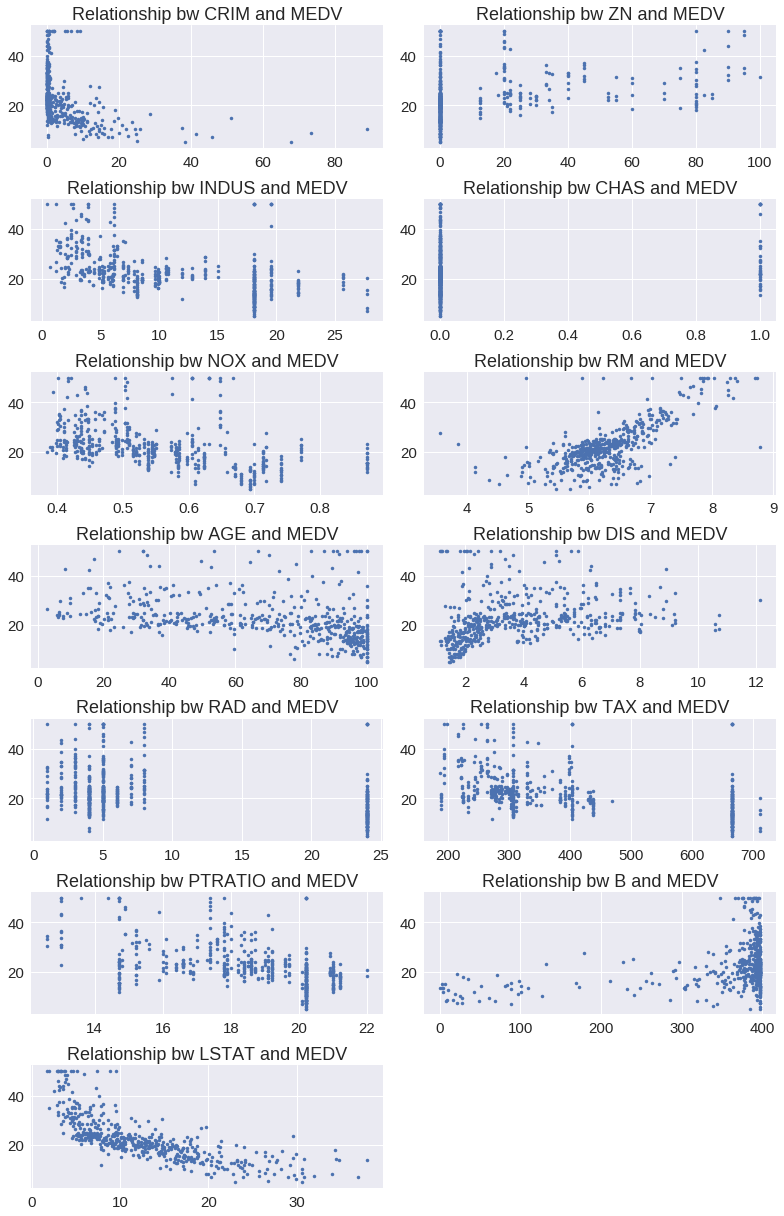

In [21]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(11, 17))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col],df["MEDV"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plotFeatures(colnames,"Relationship bw %s and MEDV")

**These graphs gives a clear intuition of relationship of target variable (Price of House) with features. We can see that RM(Avg. rooms per dwelling) has very linear relationship with MEDV.**

Another option to see the relationship is to plot the correlation of features and target variable with each other using heatmap of seaborn.This is much more descriptive also.

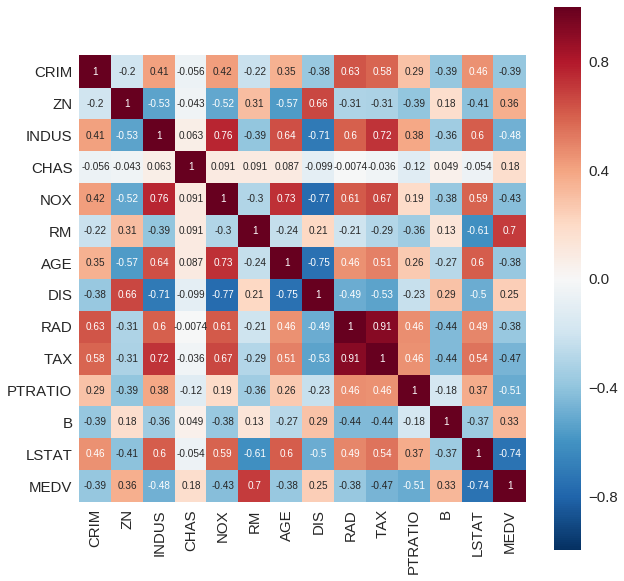

In [22]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

**MEDV has correlation coefficient of 0.7 with RM which means they vary linearly as compared to other features. So we will consider only this feature because we are not going to use any higher order terms.**

# **Finding the best parameters**

We'll first initialise the parameters to a random value (like 0). Then we will implement gradient descent to them.

After initialising the parameters, we'll find the value of cost function at those parameters. Cost function is a function which calculates the error between the value of house (target) predicted by our hypothesis h and the actual price of house in the training set. So goal of Gradient Descent is to minimise the cost. There are many ways to calculate cost function, the most common is by calculating the difference, squaring it and taking its mean.

We have separate functions for each task like predictPrice, calculateCost and gradientDescentLinearRegression.We have implemeted all the code taking theta a vector.

In [0]:
def predictPrice(x,theta):
    return np.dot(x,theta)

def calculateCost(x,theta,Y):
    prediction = predictPrice(x,theta)
    return ((prediction - Y)**2).mean()/2

abline is a utility function to make graphs after every 1000 iteration to visualise the fitted line

In [0]:
def abline(x,theta,Y):
    """Plot a line from slope and intercept"""
    
    y_vals = predictPrice(x,theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_vals, '-')
    plt.show()

def gradientDescentLinearRegression(alpha=0.047,iter=5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = df["RM"]
    x = np.column_stack((np.ones(len(predictor)),predictor))
    Y = df["MEDV"]
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha *(pred - Y).mean()
        t1 = theta[1] - alpha *((pred - Y)* x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculateCost(x,theta,Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')

Call the GradientDescentLinearRegression function with default arguments

Iteration: 1,Cost = 258.0310838585914,theta = [1.0590419  6.86646571]


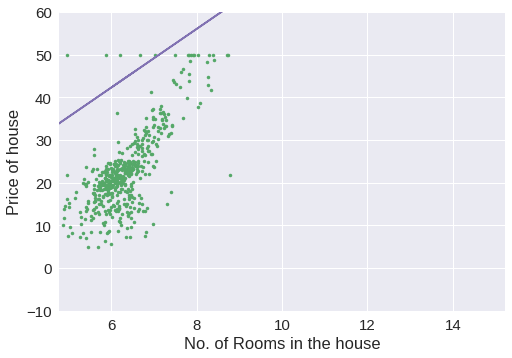

Iteration: 1001,Cost = 24.266176819465997,theta = [-14.66352286   5.95689176]


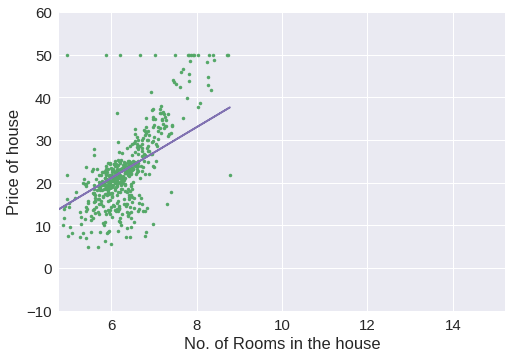

Iteration: 2001,Cost = 22.59641457365931,theta = [-23.30244842   7.31497465]


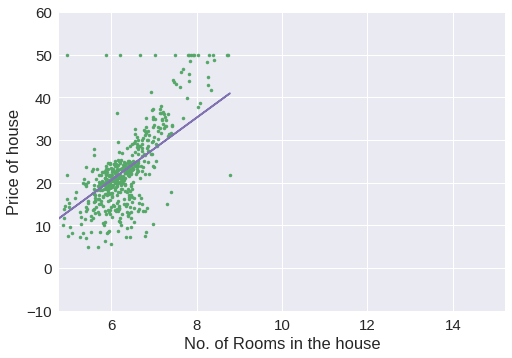

Iteration: 3001,Cost = 22.05731654846794,theta = [-28.21114608   8.08664681]


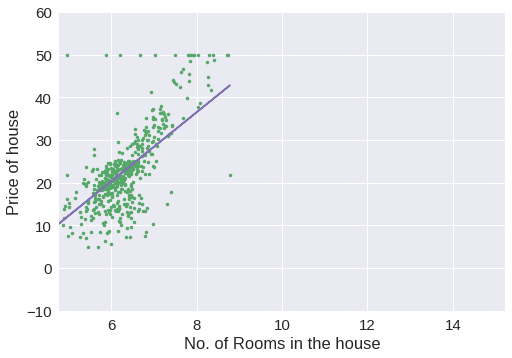

Iteration: 4001,Cost = 21.883263816412775,theta = [-31.00030227   8.52511631]


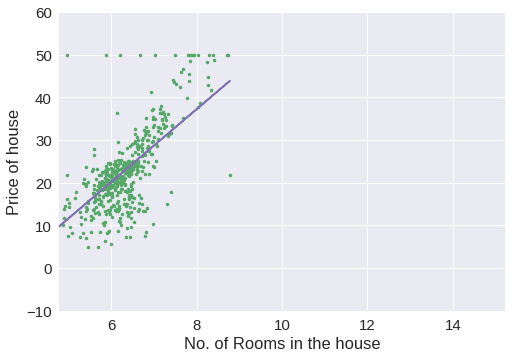

theta0 = 5000
theta1 = 5000
Costs = 5000


In [25]:
gradientDescentLinearRegression()

# So we have found the line which best describes the relationship b/w feature and target .This line can now be used to predict prices of other houses.